### Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг №1

Открытие файла и изучение информации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

from sklearn.impute import SimpleImputer

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.duplicated().sum()

0

In [7]:
len(games['Name']) == games.shape[0]

True

### Вывод по разделу:

В датафрейме есть пропуки. Дубликатов не выявленно.

Год релиза и оценка пользователя - имеют не верный тип данных, должно быть числовые. год к числовому так как кроме года сравнить больше нечего и проще сравнить просто числа.

### Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

- Обработайте пропуски при необходимости:

    -- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

    -- Опишите причины, которые могли привести к пропускам;

    -- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [8]:
columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

for i in range(len(columns)):
    columns[i] = str(columns[i]).lower() # строчная встроенная функция (метод) 
    # для приведения к нижнему регистру

games.columns = columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сначала заменим пропуски, потом приведем к нужному типу (т.к. astype не сработает при обработке NaN).

Ладно нашел потом, что можно добавить обработку NaN, но уже сделал по другому.

In [10]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как это всего две строки и в них помимо пропусков наименования и жанра пропуски также и в других столбцах, так что удалим чтобы не мешались.

In [11]:
games[(games['platform'] == 'GEN') & (games['year_of_release'] == 1993.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как ни название игры, ни жанр не определить у пропущенных, то заменю пропуски на значение "неопределено".

In [12]:
games.dropna(subset=['genre'], inplace=True)

In [13]:
games[(games['platform'] == 'GEN') & (games['year_of_release'] == 1993.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7885,Shining Force II,GEN,1993.0,Strategy,0.0,0.0,0.19,0.0,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.0,0.0,0.15,0.0,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.0,0.0,0.05,0.0,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.0,0.0,0.05,0.0,NaN,NaN,NaN


In [14]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как некоторые годы выпуска можно определить по названию столбцов, то попробую заменить их. Их всего 269 строк, поглядим что в них.

In [15]:
name_year_NaN = games[games['year_of_release'].isnull()]['name'].values
name_year_NaN

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Rock Band', 'Call of Duty: Black Ops', 'Rock Band',
       'Triple Play 99', 'Adventure', 'LEGO Batman: The Videogame',
       'Combat', 'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Rock Band',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'LEGO Harry Potter: Years 5-7',
       'Wheel of Fortune', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'The Lord of the Rings: War in the North',
       'Shaun White Snowboarding', 'PES 2009: Pro Evolution Soccer',
       'WarioWare: Twis

Предположим, что год в названии (даже надписи типа 2К8 и 07) совпадает с годом выпуска. Это конечно легко проверить в интернете, но пока не буду усложнять. Остальные данные придется отбросить( т.к. даже понятия не имею как по имеющимся данным их заполнить...а искать в интеренете займет уйму времени.

Ручками запишем замену пропускив построчно для каждой игры.

In [16]:
games[games['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Так так, первая же проверка показала, что это бессмыслено - Madden NFL 2004 имеет год выпуска 2003 на всех прочих платформах кроме PS2. Заполним пропуск 2003 годом.

In [17]:
for i in name_year_NaN:
    print(games[games['name'] == i][['name', 'platform', 'year_of_release']])
    print()

                 name platform  year_of_release
183   Madden NFL 2004      PS2              NaN
1881  Madden NFL 2004       XB           2003.0
3889  Madden NFL 2004       GC           2003.0
5708  Madden NFL 2004      GBA           2003.0

                   name platform  year_of_release
377    FIFA Soccer 2004      PS2              NaN
2606   FIFA Soccer 2004       XB           2003.0
12029  FIFA Soccer 2004       GC           2003.0
13086  FIFA Soccer 2004      GBA           2003.0

                             name platform  year_of_release
397    LEGO Batman: The Videogame     X360           2008.0
456    LEGO Batman: The Videogame      Wii              NaN
460    LEGO Batman: The Videogame       DS           2008.0
1519   LEGO Batman: The Videogame      PS3           2008.0
1538   LEGO Batman: The Videogame      PSP              NaN
1553   LEGO Batman: The Videogame      PS2           2008.0
12465  LEGO Batman: The Videogame       PC           2008.0

                           

4437  Super Breakout     2600              NaN

                                       name platform  year_of_release
4445  Robert Ludlum's The Bourne Conspiracy     X360              NaN
4945  Robert Ludlum's The Bourne Conspiracy      PS3              NaN

              name platform  year_of_release
4635  NHL Slapshot      Wii              NaN

      name platform  year_of_release
4648  TERA       PC              NaN

                  name platform  year_of_release
4775  NFL GameDay 2003      PS2              NaN

                              name platform  year_of_release
1609  LEGO Harry Potter: Years 5-7      Wii              NaN
2132  LEGO Harry Potter: Years 5-7     X360              NaN
2273  LEGO Harry Potter: Years 5-7      PS3              NaN
3081  LEGO Harry Potter: Years 5-7       DS              NaN
4818  LEGO Harry Potter: Years 5-7      3DS              NaN
6476  LEGO Harry Potter: Years 5-7      PSP              NaN
7210  LEGO Harry Potter: Years 5-7       PC      

In [18]:
games['year_of_release'].median()

2007.0

In [19]:
name_year_NaN

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Rock Band', 'Call of Duty: Black Ops', 'Rock Band',
       'Triple Play 99', 'Adventure', 'LEGO Batman: The Videogame',
       'Combat', 'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Rock Band',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'LEGO Harry Potter: Years 5-7',
       'Wheel of Fortune', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'The Lord of the Rings: War in the North',
       'Shaun White Snowboarding', 'PES 2009: Pro Evolution Soccer',
       'WarioWare: Twis

In [20]:
for i in range(len(name_year_NaN)):

    game = name_year_NaN[i]
    games_samples = games[games['name'] == game]

    median = games_samples['year_of_release'].median()
    
    if not np.isnan(median):
        games_samples.fillna(median, inplace=True)
    else:
        games_samples.fillna(games['year_of_release'].median(), inplace=True)
        
    indexes_list = games_samples.index
    
    for j in indexes_list:
        games.loc[j, 'year_of_release'] = games_samples.loc[j, 'year_of_release']


C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [21]:
games['year_of_release'].isnull().sum()

0

14126 - Housekeeping нет информации по игре

**Rock Band - 4 пропуска, поискал инфо в интернете.**

**Короче я припарился по всем играм)**

In [22]:
games['year_of_release'].describe()

count    16713.000000
mean      2006.494854
std          5.837165
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

**Так как некоторые игры релизом ранее 1980 года, то ставлю ранние годы ставлю релизом 1980.**

In [23]:
games.shape

(16713, 11)

In [24]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 2.1+ MB


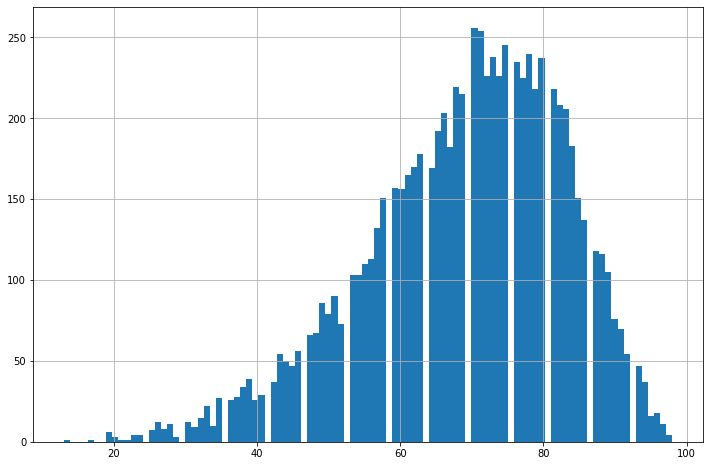

In [26]:
games['critic_score'].hist(bins=100, figsize=(12, 8));

In [27]:
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Сгруппируем оценку критиков по жанрам и заполним пропуски средним. Средним так как нет выбросов.

Аналогично поступим с пользовательскими оценками.

Замену пропусков на среднее значение обуславливаем высокой вероятностью близости реальных значений к средним с определенной дисперсией.

In [28]:
try:
    games['critic_score'] = games.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))
except:
    print("D'oр")

In [29]:
games['critic_score']

0        76.000000
1        68.058350
2        82.000000
3        80.000000
4        72.652646
           ...    
16710    66.629101
16711    71.968174
16712    65.331269
16713    68.058350
16714    68.619318
Name: critic_score, Length: 16713, dtype: float64

In [30]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

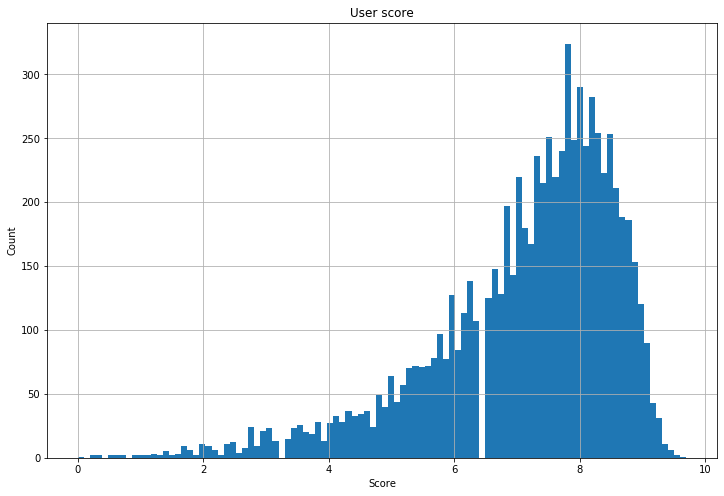

In [31]:
games['user_score'].hist(bins=100, figsize=(12,8))
plt.title('User score')
plt.xlabel('Score')
plt.ylabel('Count');

In [32]:
games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [33]:
try:
    games['user_score'] = games.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))
except:
    print("D'oh")

In [34]:
games['user_score'].describe()

count    16713.000000
mean         7.114993
std          1.022428
min          0.000000
25%          6.961197
50%          7.133000
75%          7.600000
max          9.700000
Name: user_score, dtype: float64

**Ищем моды сгруппированных по жанру рейтингов и выставляем в соответствующем пропуске значение моды.**

По моему мнению, самое логичное заменить пропуски модами по жанрам, так как в большинстве случае мы будем правы.

In [35]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Согласно того что нашел в википедии, E, E10+, EC, T, M, AO, RP - считаем нормальными. K-A оценки не существует - считаем ошибкой, так как экземпляров таких только 3 для точности удалил. 

RP («Rating Pending») — рейтинг ожидается, продукт был отправлен в ESRB и ожидает присвоения рейтинга. То есть рейтинга по-сути нет, так что тоже можно удалить экземпляры.

Итого - минус 6 экземпляров из 16 тысяч.

In [36]:
genres = games['genre'].unique()
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [37]:
for i in genres:
    print(i)
    print(games[games['genre'] == i]['rating'].value_counts())
    print('______________________')

Sports
E       1188
T        198
E10+     107
M         16
Name: rating, dtype: int64
______________________
Platform
E       358
E10+    144
T        64
M         3
Name: rating, dtype: int64
______________________
Racing
E       585
T       172
E10+     96
M        18
RP        1
Name: rating, dtype: int64
______________________
Role-Playing
T       420
M       162
E10+    111
E        84
Name: rating, dtype: int64
______________________
Puzzle
E       289
E10+     43
T        10
Name: rating, dtype: int64
______________________
Misc
E       457
T       239
E10+    167
M        13
EC        5
K-A       1
Name: rating, dtype: int64
______________________
Shooter
M       565
T       348
E10+     58
E        48
Name: rating, dtype: int64
______________________
Simulation
E       325
T       190
E10+     48
M         5
Name: rating, dtype: int64
______________________
Action
T       681
M       608
E10+    481
E       416
EC        1
AO        1
Name: rating, dtype: int64
_______________

In [38]:
for i in games[games['rating'].isnull()].index:
    
    if games.loc[i, 'genre'] in ['Sports', 'Platform', 'Racing', 'Puzzle', 'Misc', 'Simulation', 'Adventure']:
        #E
        games.loc[i, 'rating'] = 'E'
    elif games.loc[i, 'genre'] in ['Role-Playing', 'Action', 'Fighting', 'Strategy']:
        #T
        games.loc[i, 'rating'] = 'T'
    elif games.loc[i, 'genre'] in ['Shooter']:
        #M
        games.loc[i, 'rating'] = 'M'
    

In [39]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 2.1+ MB


In [40]:
games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15789,Ketsui Death Label,DS,2008,Shooter,0.00,0.00,0.02,0.00,70.181144,7.041883,M
13626,The Wolf Among Us,PSV,2014,Adventure,0.03,0.00,0.00,0.01,65.331269,8.400000,M
2675,Tetris Party Deluxe,DS,2010,Puzzle,0.28,0.30,0.12,0.07,76.000000,7.175000,E
3169,Lemony Snicket's A Series of Unfortunate Events,PS2,2004,Platform,0.31,0.24,0.00,0.08,63.000000,5.700000,E
12669,The History Channel: Battle for the Pacific,X360,2007,Shooter,0.05,0.00,0.00,0.00,35.000000,6.100000,T
15728,Mai-Otome Hime: Otome Butou Shi,PS2,2006,Fighting,0.00,0.00,0.02,0.00,69.217604,7.302506,T
14440,Pocket Fighter,SAT,1998,Fighting,0.00,0.00,0.03,0.00,69.217604,7.302506,T
14386,Airship Q,PSV,2015,Platform,0.00,0.00,0.03,0.00,68.058350,7.301402,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.619318,7.134593,E
12961,Hi-Octane: The Track Fights Back!,PS,1995,Racing,0.03,0.02,0.00,0.00,67.963612,7.036193,E


In [41]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [42]:
games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
7401,World of Final Fantasy,PSV,2016,Role-Playing,0.04,0.06,0.08,0.03,77.000000,8.600000,E10+,0.21
9331,FIFA Street 2,PSP,2006,Sports,0.07,0.05,0.00,0.02,58.000000,6.900000,E,0.14
10925,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS4,2016,Action,0.05,0.02,0.00,0.02,44.000000,5.500000,T,0.09
2191,Rocksmith 2014,X360,2013,Misc,0.69,0.16,0.00,0.09,66.619503,6.819362,E,0.94
7462,StokEd,X360,2009,Sports,0.18,0.01,0.00,0.01,68.000000,8.600000,T,0.20
3723,World Soccer Winning Eleven 7 International (J...,PS2,2004,Sports,0.00,0.00,0.54,0.00,71.968174,6.961197,E,0.54
15170,Star Trek Online,PC,2010,Role-Playing,0.00,0.02,0.00,0.00,66.000000,6.200000,T,0.02
9658,LEGO Marvel's Avengers,PSV,2016,Action,0.02,0.07,0.00,0.03,66.629101,6.600000,E10+,0.12
1758,Worldwide Soccer Manager 2009,PC,2008,Simulation,0.00,1.14,0.00,0.01,83.000000,8.100000,E,1.15
8700,Chaotic: Shadow Warriors,X360,2009,Action,0.14,0.00,0.00,0.01,60.000000,5.000000,E10+,0.15


### Вывод по разделу:

Были заменены типы данных в столбцах с годом релиза и пользовательской оценкой на численные.

Часть пропусков удалил, также были удалены строки с не полученным рейтингом. Пропуски оценок были заменены на средние по столбцу, так как не было выбросов. Пропуски рейтинга заменены на моды в зависимости от жанра.

Добавлен столбец суммы продаж по всем регионам.

### Шаг 3. Проведение исследовательского анализа данных

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

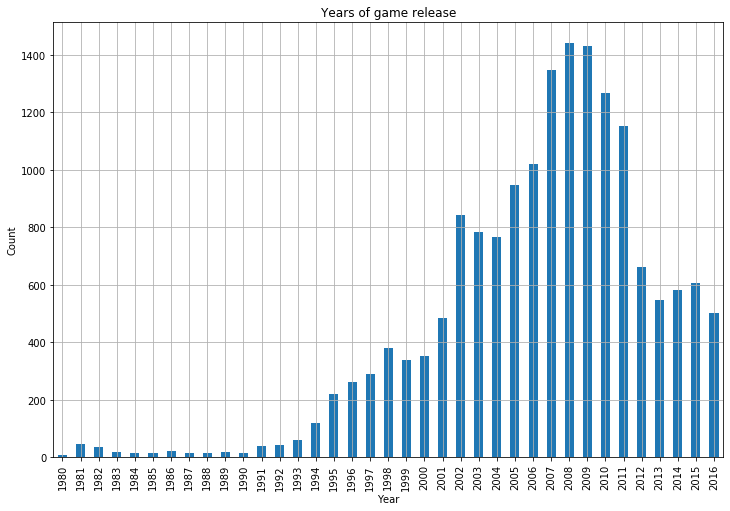

In [43]:
games.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(12, 8), grid=True)
plt.title('Years of game release')
plt.xlabel('Year')
plt.ylabel('Count');

Количество игр после 1993 года растет скачкообразно (за некоторыми исключениями). Поэтому можно отбросить годы ранее 1994 года.

In [44]:
plat_year = games.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum').reset_index()

In [45]:
plat_year

,platform,year_of_release,sum_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
244,XB,2008,0.18
245,XOne,2013,18.96
246,XOne,2014,54.07
247,XOne,2015,60.14


In [46]:
platforms_list = plat_year['platform'].unique()
platforms_list

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

<Figure size 864x720 with 0 Axes>

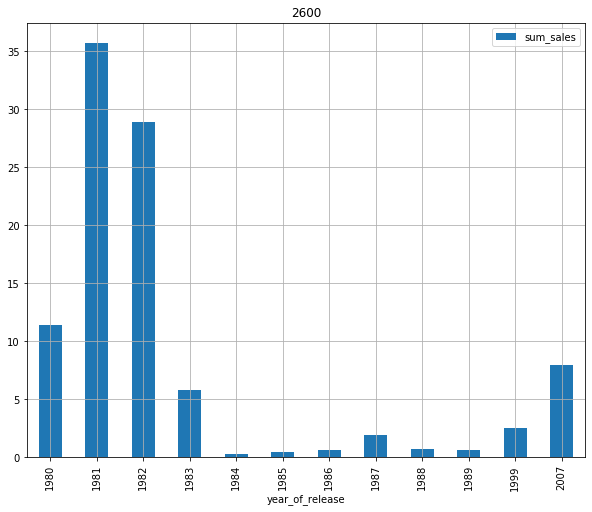

<Figure size 864x720 with 0 Axes>

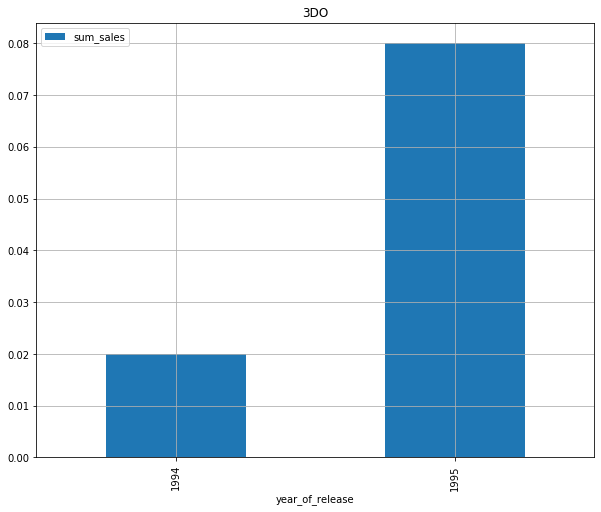

<Figure size 864x720 with 0 Axes>

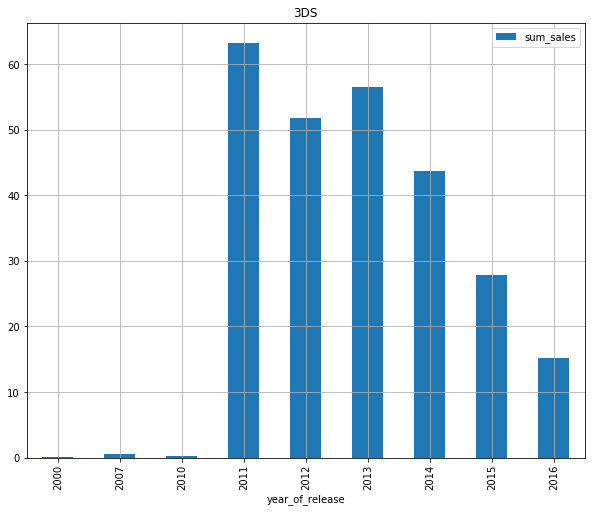

<Figure size 864x720 with 0 Axes>

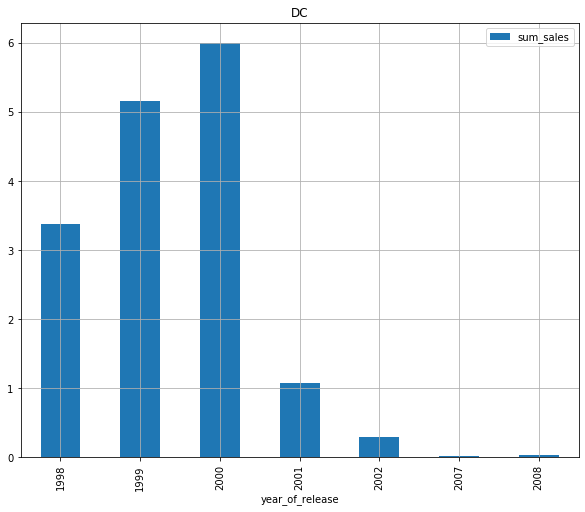

<Figure size 864x720 with 0 Axes>

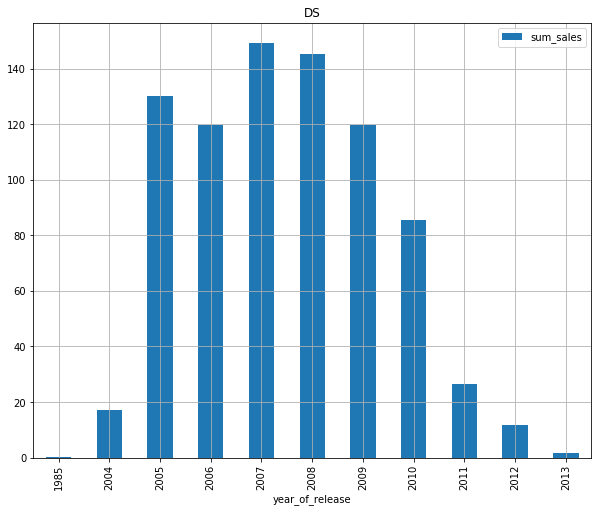

<Figure size 864x720 with 0 Axes>

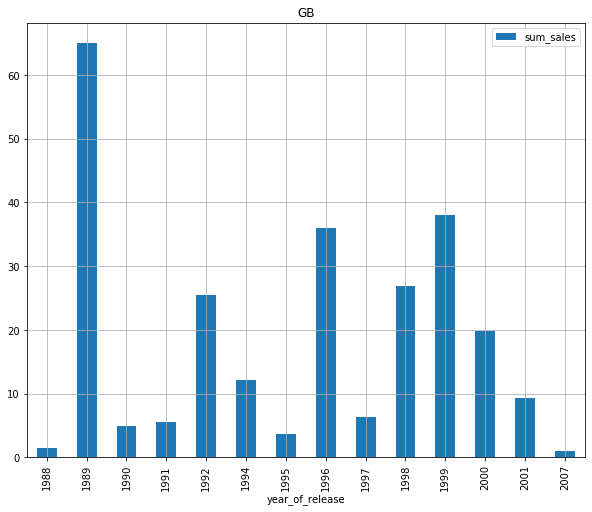

<Figure size 864x720 with 0 Axes>

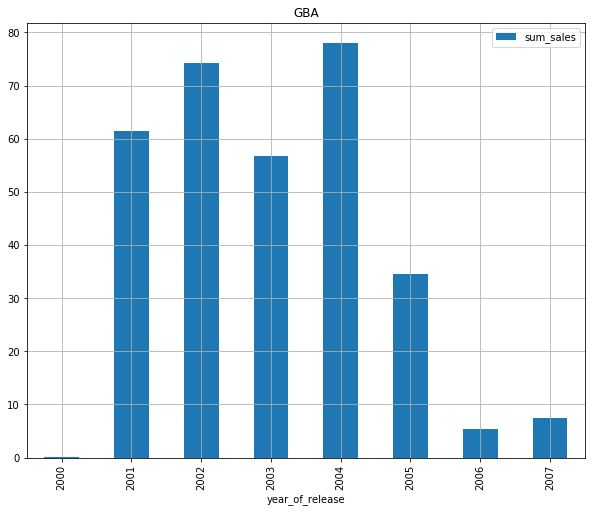

<Figure size 864x720 with 0 Axes>

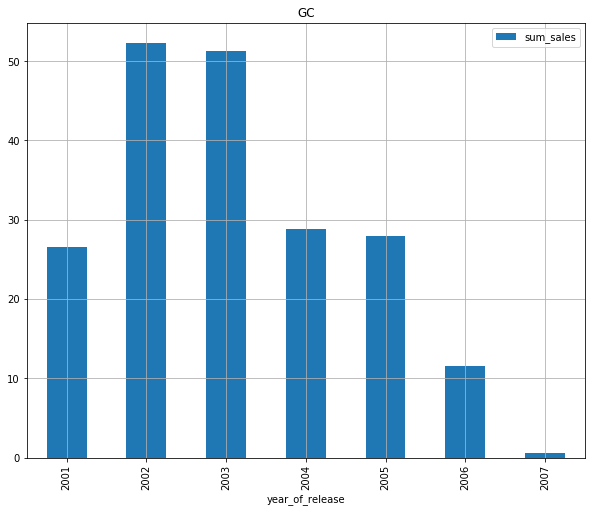

<Figure size 864x720 with 0 Axes>

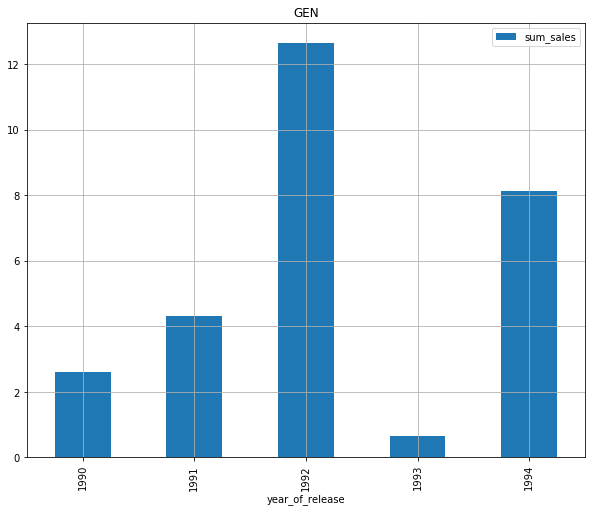

<Figure size 864x720 with 0 Axes>

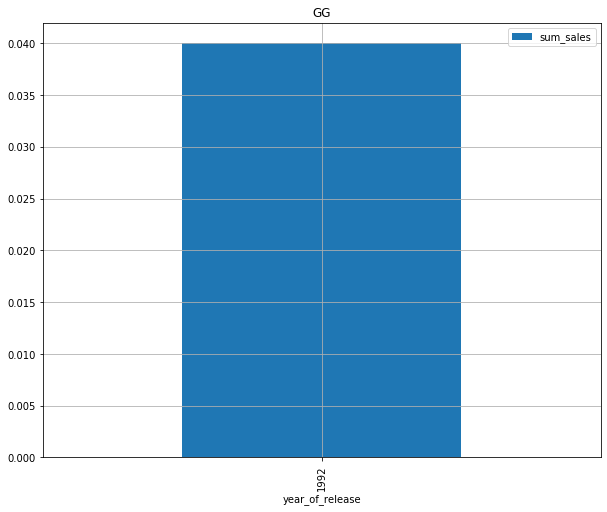

<Figure size 864x720 with 0 Axes>

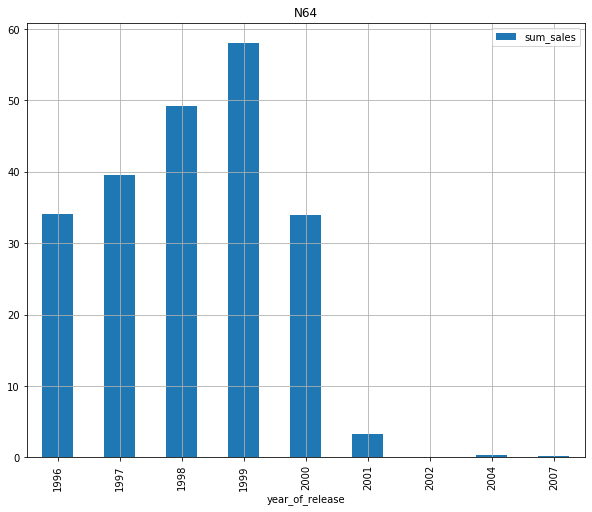

<Figure size 864x720 with 0 Axes>

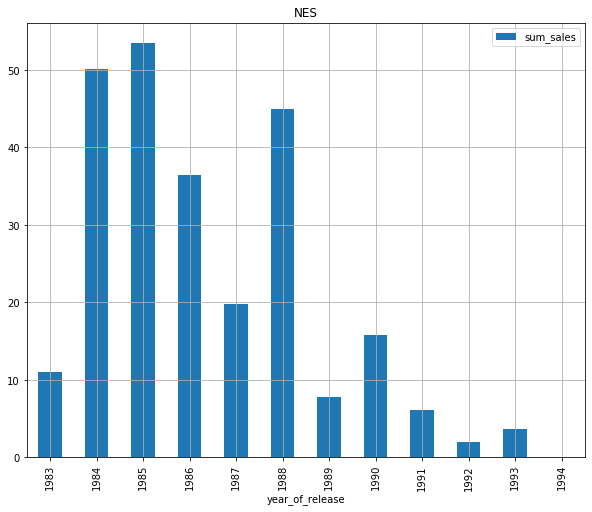

<Figure size 864x720 with 0 Axes>

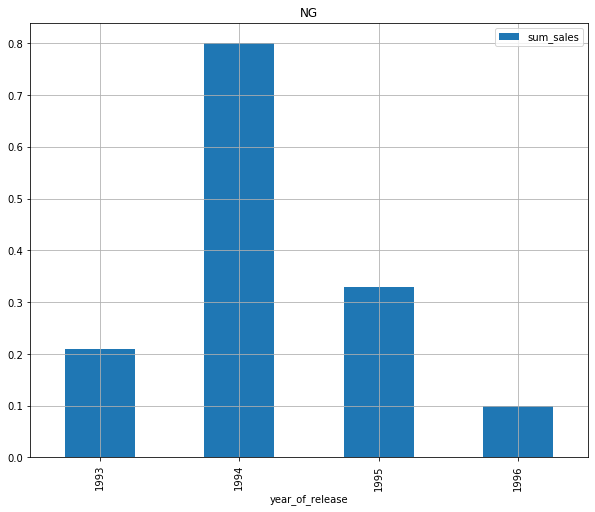

<Figure size 864x720 with 0 Axes>

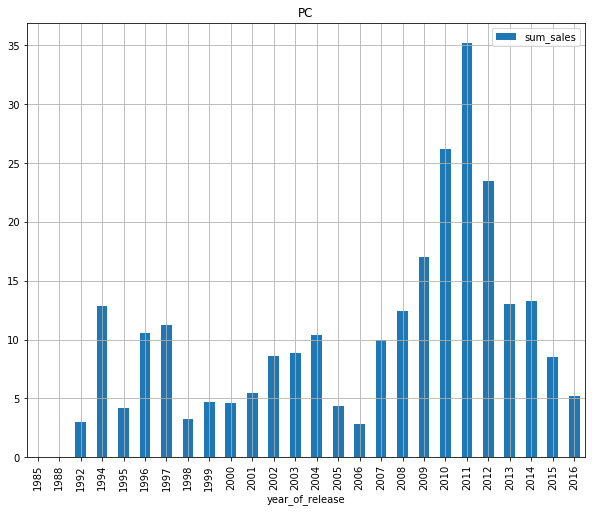

<Figure size 864x720 with 0 Axes>

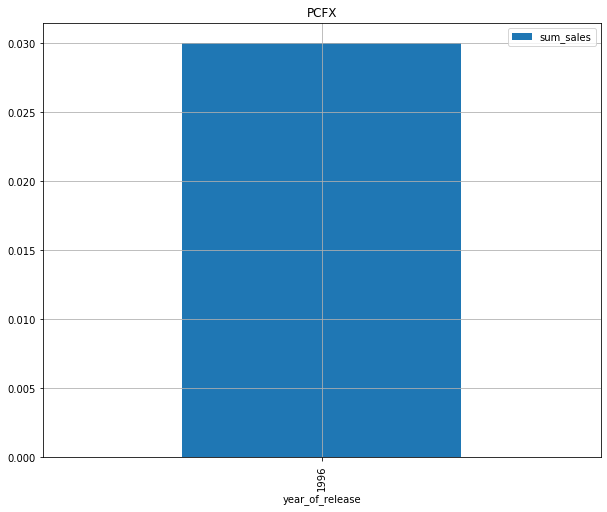

<Figure size 864x720 with 0 Axes>

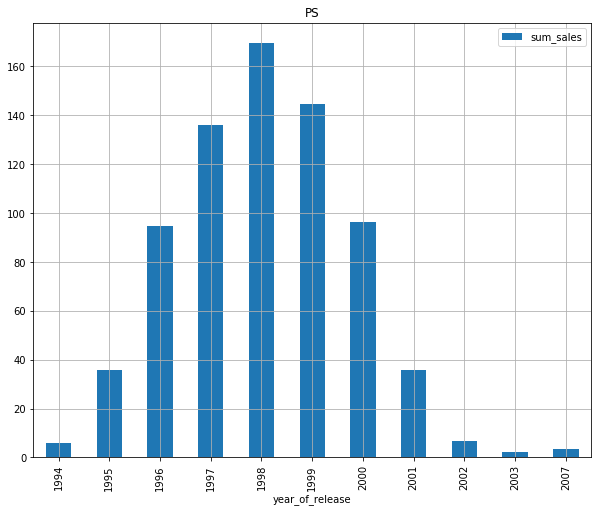

<Figure size 864x720 with 0 Axes>

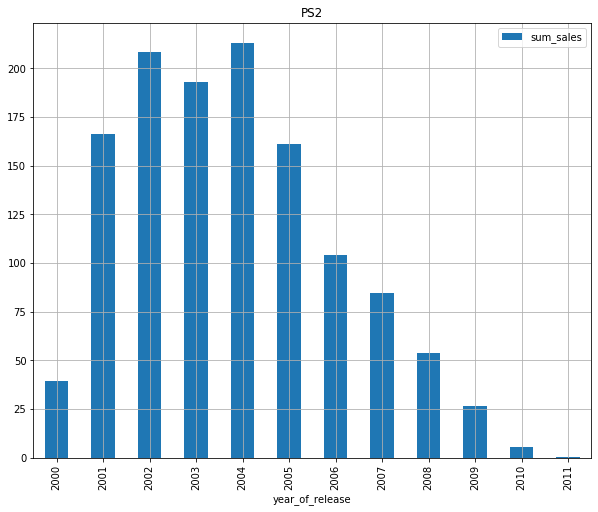

<Figure size 864x720 with 0 Axes>

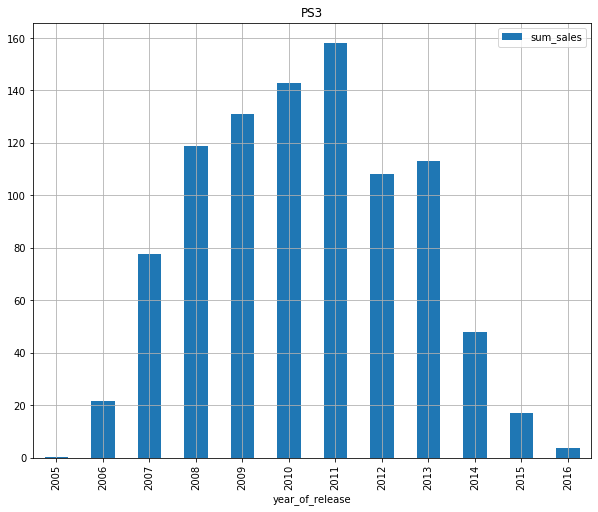

<Figure size 864x720 with 0 Axes>

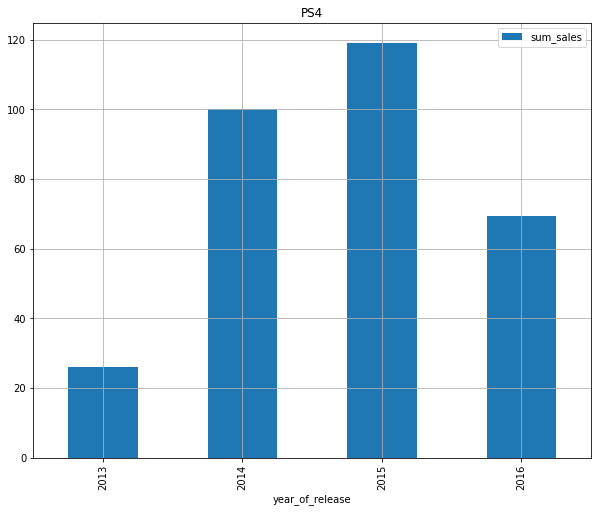

<Figure size 864x720 with 0 Axes>

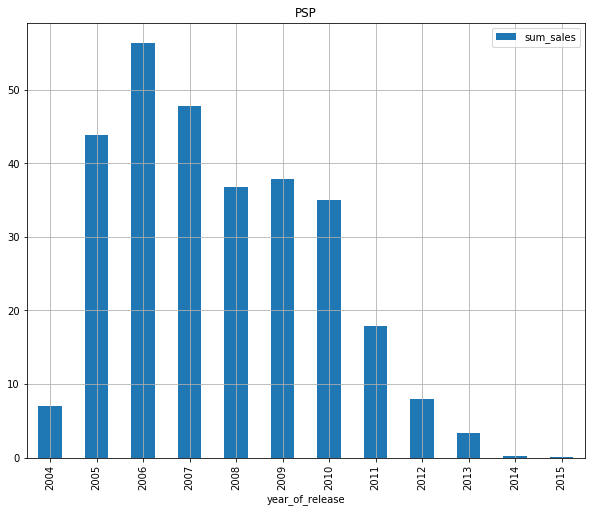

<Figure size 864x720 with 0 Axes>

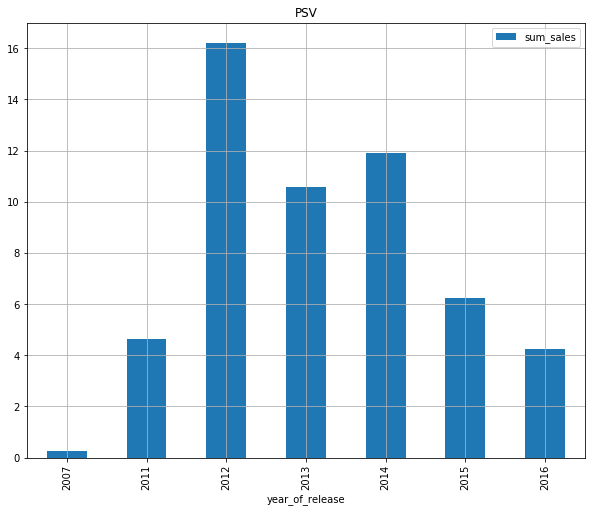

<Figure size 864x720 with 0 Axes>

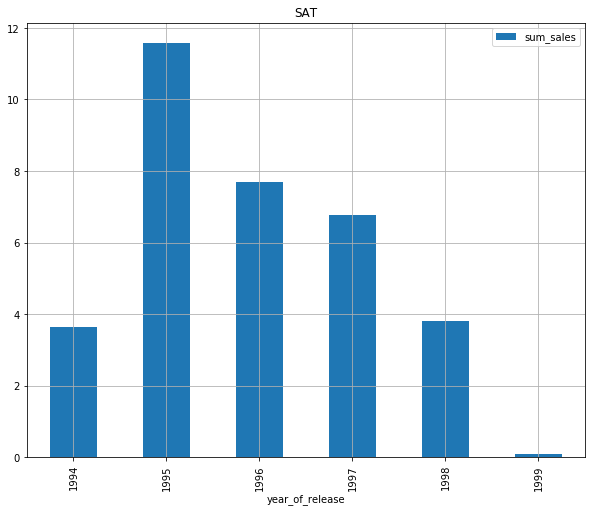

<Figure size 864x720 with 0 Axes>

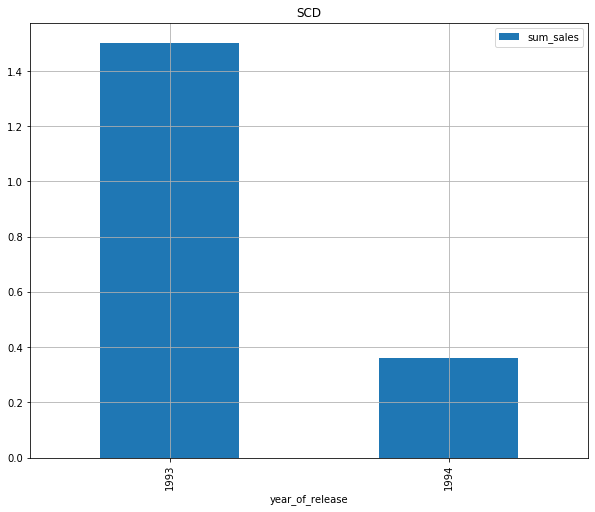

<Figure size 864x720 with 0 Axes>

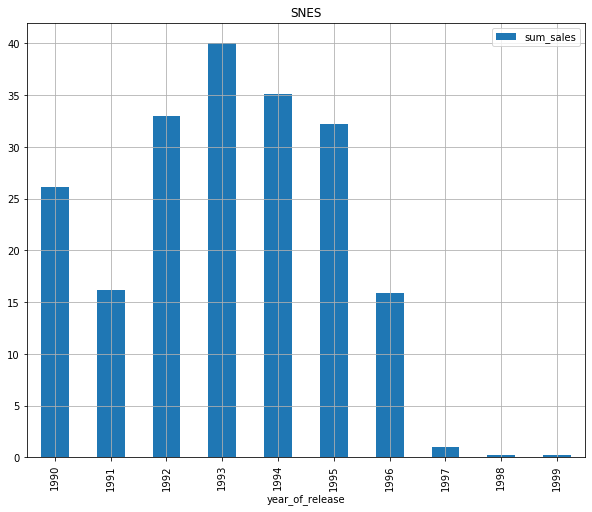

<Figure size 864x720 with 0 Axes>

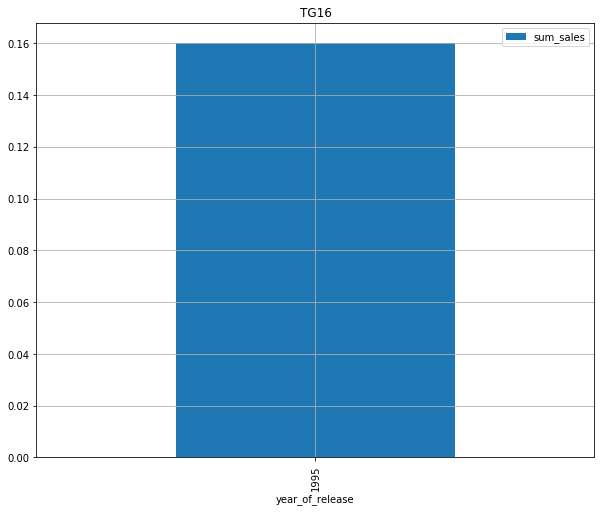

<Figure size 864x720 with 0 Axes>

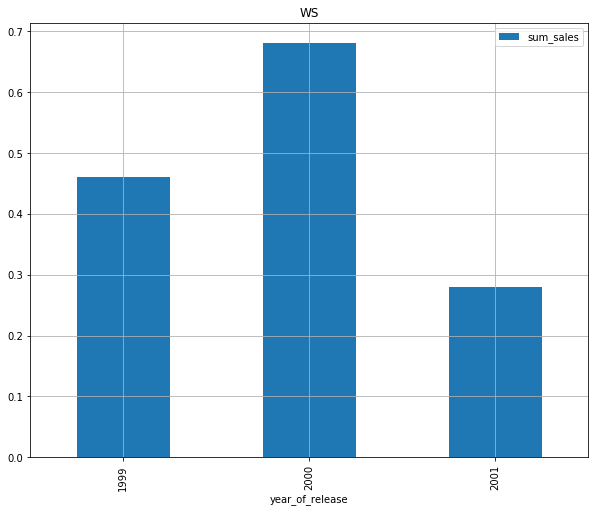

<Figure size 864x720 with 0 Axes>

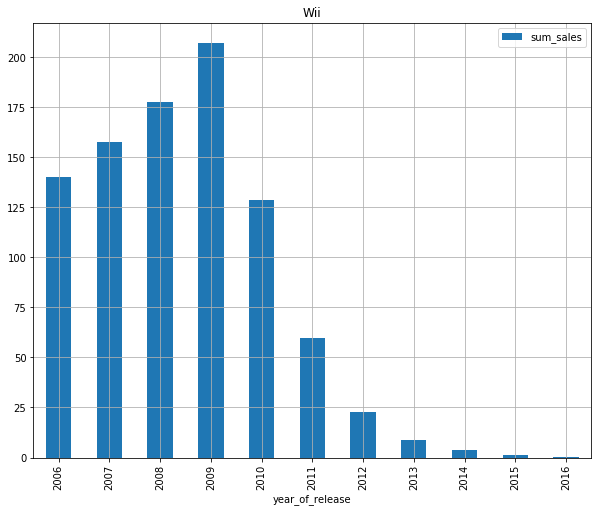

<Figure size 864x720 with 0 Axes>

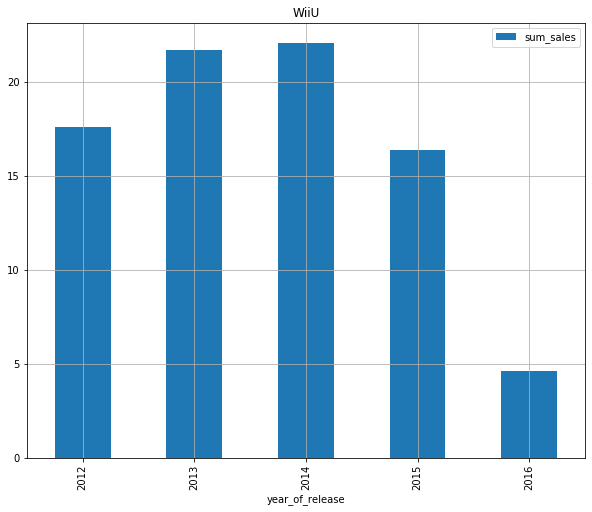

<Figure size 864x720 with 0 Axes>

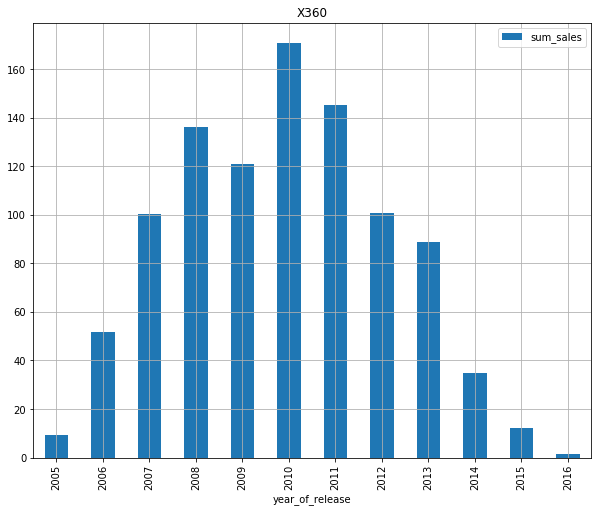

<Figure size 864x720 with 0 Axes>

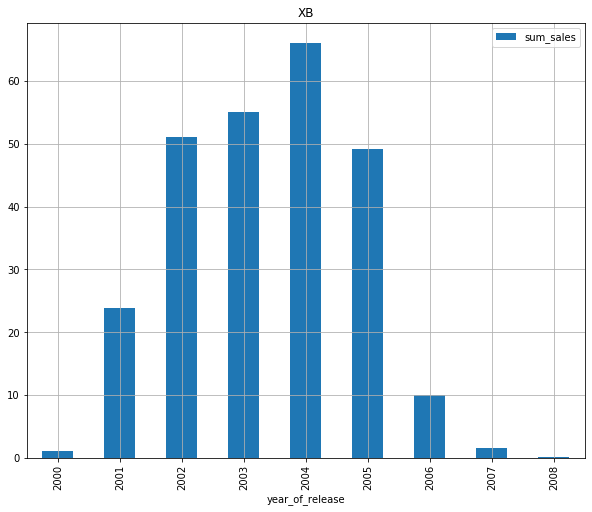

<Figure size 864x720 with 0 Axes>

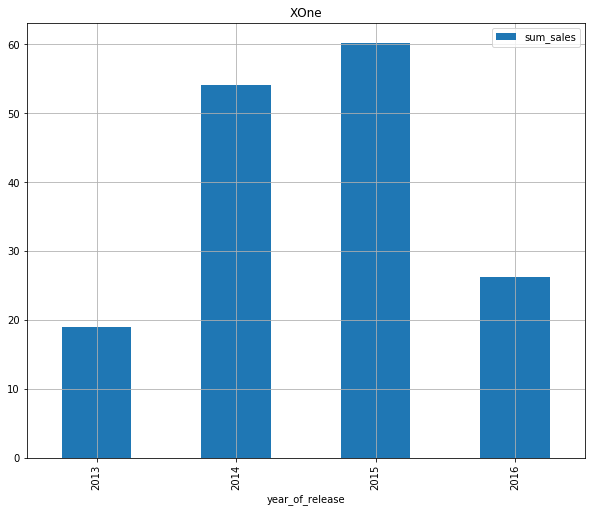

In [47]:
for i in platforms_list:
    #print(i)
    plt.figure(figsize=(12, 10))
    plat_year[plat_year['platform'] == i].plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10,8), grid=True, title=i)

Платформа 2600 - спад в производстве игр в 1983, после этого года игр практически не продавалось, относительно ранних годов.

3DO - существовала только в 1994 и 1995 годах.

3DS - имела хорошие продажи с 2011 по 2016 годы. Можно взять в расчет.

DC - хорошие показатели продаж с 1998 по 2001. После 2002 года практически ничего не заработали. Есть разрыв в годах продаж с 2002 по 2007.

DS - отличные продажи с 2004 по 2012 годы. Нужно брать в расчет.

GB - хорошие продажи с 1989 по 2001. Берем в расчет.

GBA - хорошие продажи с 2001 по 2007.

GC - хорошие продажи с 2001 по 2007.

GEN - хорошие продажи с 1990 по 1194.

GG - продажи только в 1192 году.

N64 - хорошие продажи с 1996 по 2001. Разрыв с 2002 по 2004, дальше нет продаж.

NES - хорошие продажи с 1983 по 1993. После 1994 года нет продаж.

NG - продажи с 1993 по 1996 годы.

PC - хорошие продажи с 1992 по 2016. Однозначно берем в расчет.

PCFX - продажи только за 1996 год.

PS - хорошие продажи с 1994 по 2003. Дальше эра PS2.

PS2 - хорошие продажи с 2000 по 2010. Дальше эра PS3.

PS3 - хорошие продажи с 2006 по 2016. Дальше эра PS4.

PS4 - хорошие продажи с 2013 по 2016.

PSP - хорошие продажи с 2006 по 2014.

PSV - хорошие продажи с 2011 по 2016.

SAT - хорошие продажи с 1994 по 1999.

SCD - продажи с 1993 по 1994.

SNES - хорошие продажи с 1990 по 1997.

TG16 - продажи только 1995.

WS - продажи с 1999 по 2001.

Wii - хорошие продажи с 2006 по 2015.

WiiU - хорошие продажи с 2012 по 2016.

X360 - хорошие продажи с 2005 по 2016.

XB - хорошие продажи с 2000 по 2008.

XOne - хорошие продажи с 2013 по 2016.

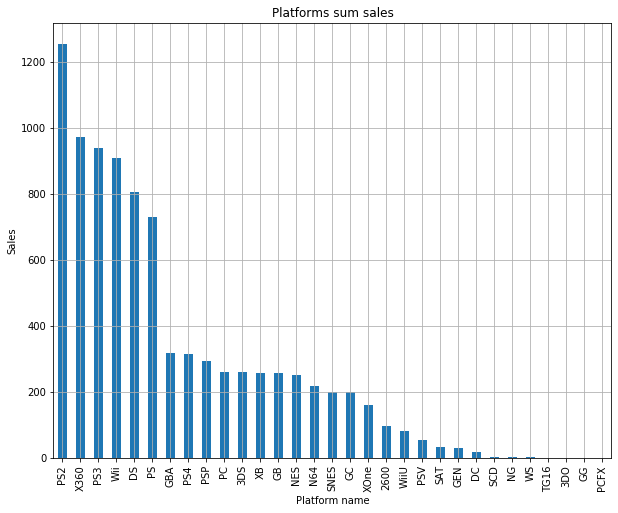

In [48]:
games.groupby('platform').agg('sum').sort_values('sum_sales', ascending=False)['sum_sales'].plot(kind='bar', figsize=(10, 8), grid=True)
plt.title('Platforms sum sales')
plt.xlabel('Platform name')
plt.ylabel('Sales');

In [49]:
games.groupby('platform').agg('sum').sort_values('sum_sales', ascending=False).loc[:'PSV', :].index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV'],
      dtype='object', name='platform')

Платформы с наибольшими суммарными продажами представленны в листинге ячейкой выше, их гистограммы распределений представлены ранее.  

Графики количества игр по годам и суммарными продажами явно коррелированы, возможно это связано с тем, что с 1994 выпускалось больше игр, росло количество платформ и стоимость игр росла.

In [50]:
games.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='count')

sum_sales
platform year_of_release           
2600     1980                     9
         1981                    46
         1982                    36
         1983                    11
         1984                     1
...                             ...
XB       2008                     1
XOne     2013                    19
         2014                    61
         2015                    80
         2016                    87

[249 rows x 1 columns]

In [51]:
years_per_platform = []

for i in platforms_list:
    print(i)
    print(plat_year[plat_year['platform'] == i]['year_of_release'].describe())
    print('________________________________')
    years_per_platform.append(plat_year[plat_year['platform'] == i]['year_of_release'].count())

pd.Series(years_per_platform).describe()

2600
count      12.000000
mean     1987.583333
std         7.890827
min      1980.000000
25%      1982.750000
50%      1985.500000
75%      1988.250000
max      2007.000000
Name: year_of_release, dtype: float64
________________________________
3DO
count       2.000000
mean     1994.500000
std         0.707107
min      1994.000000
25%      1994.250000
50%      1994.500000
75%      1994.750000
max      1995.000000
Name: year_of_release, dtype: float64
________________________________
3DS
count       9.000000
mean     2010.888889
std         4.910307
min      2000.000000
25%      2010.000000
50%      2012.000000
75%      2014.000000
max      2016.000000
Name: year_of_release, dtype: float64
________________________________
DC
count       7.000000
mean     2002.142857
std         3.891382
min      1998.000000
25%      1999.500000
50%      2001.000000
75%      2004.500000
max      2008.000000
Name: year_of_release, dtype: float64
________________________________
DS
count      11.000000
mean

count    31.000000
mean      8.032258
std       5.186417
min       1.000000
25%       4.000000
50%       8.000000
75%      11.500000
max      26.000000
dtype: float64

Платформы в среднем существуют в течение 7-8 лет, минимальный срок существования 1 год, максимальный 26 лет.

**Акутальный период, позволяющий определить/спрогнозировать продажи в следующие года я бы взял c 2000 по 2016 годы, так как много платформ перестало существовать, а новые с 2000 года укрепились.**

На мой взгляд, лучше, конечно, отталкиваться не от периода, а от существующих платформ - те которые имеют продажи на 2016 год.

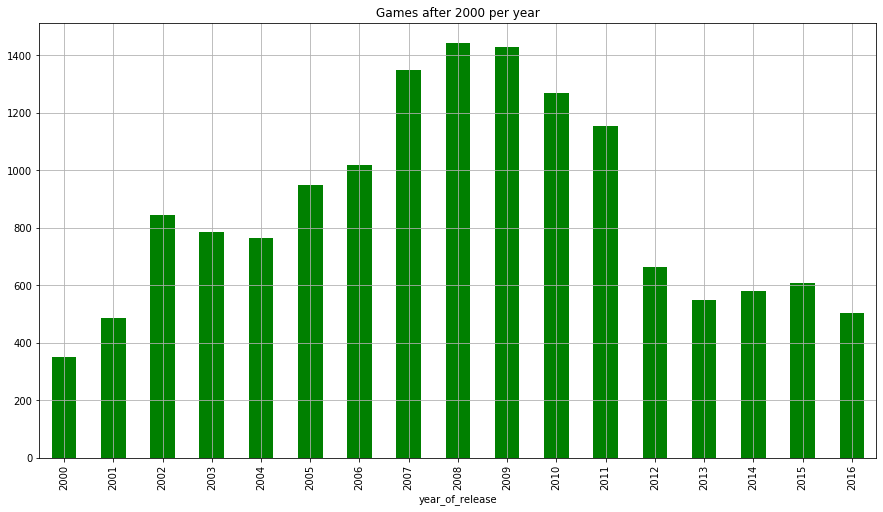

In [52]:
games_2000 = games[games['year_of_release'] >= 2000]
games_2000.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(15, 8), grid=True, \
                                                                title='Games after 2000 per year', color='green');

In [53]:
new_platforms_list = games_2000['platform'].unique()
new_platforms_list

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC',
       '2600', 'WS'], dtype=object)

In [54]:
plat_year_2000 = plat_year[plat_year['year_of_release'] >= 2000]
plat_year_2000

,platform,year_of_release,sum_sales
11,2600,2007,7.97
14,3DS,2000,0.02
15,3DS,2007,0.47
16,3DS,2010,0.30
17,3DS,2011,63.20
...,...,...,...
244,XB,2008,0.18
245,XOne,2013,18.96
246,XOne,2014,54.07
247,XOne,2015,60.14


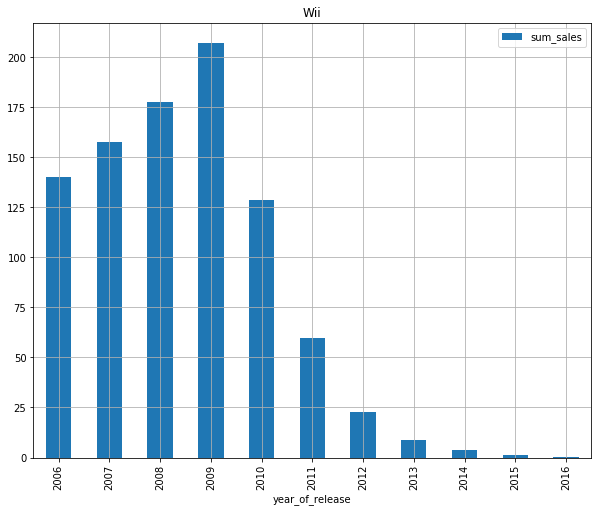

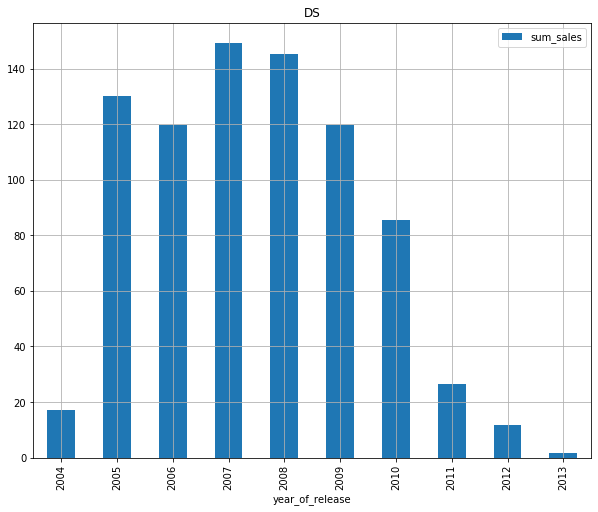

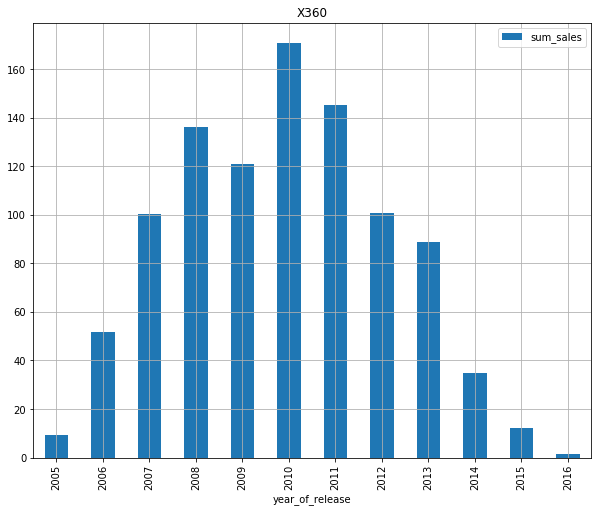

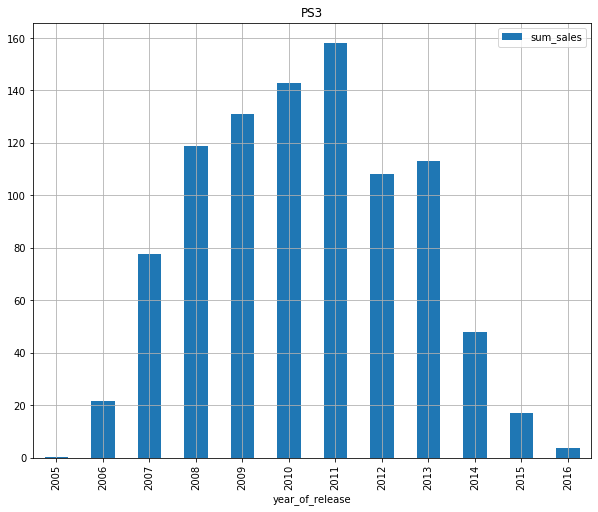

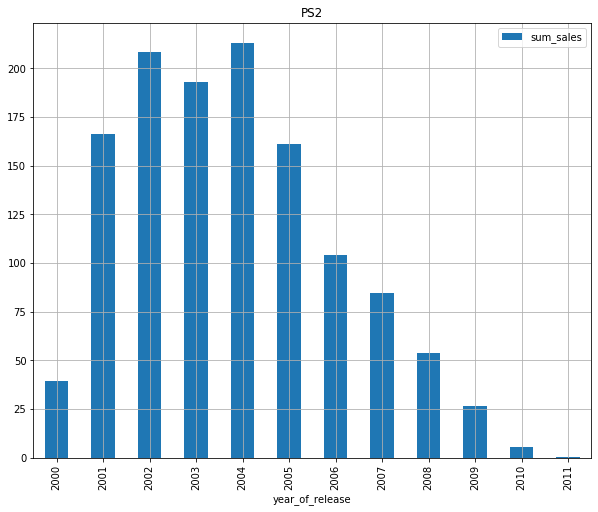

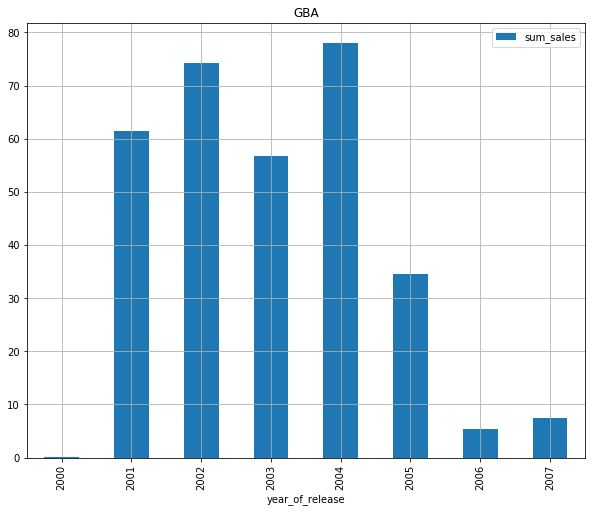

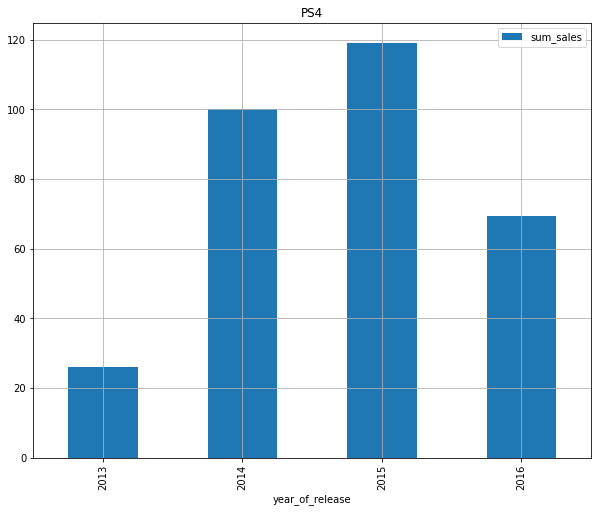

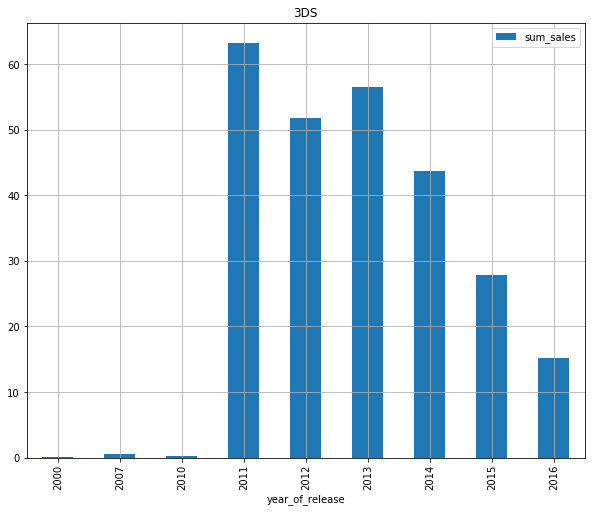

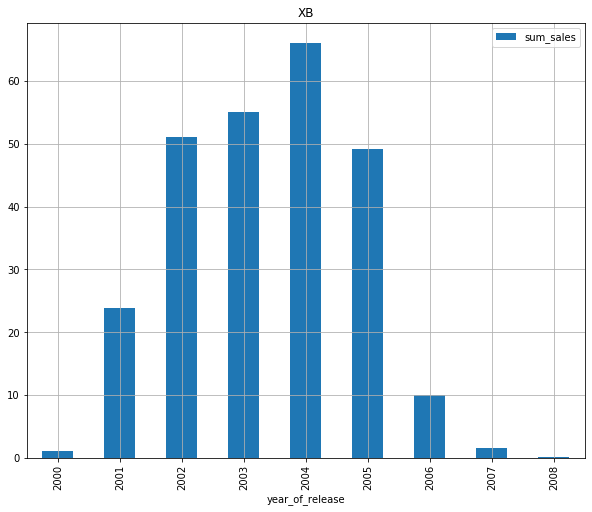

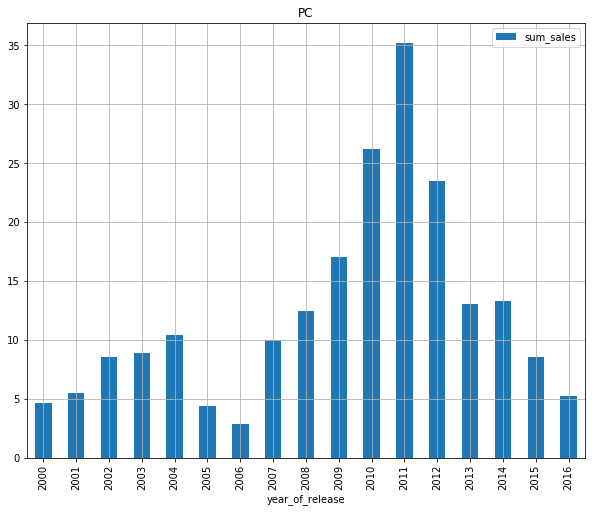

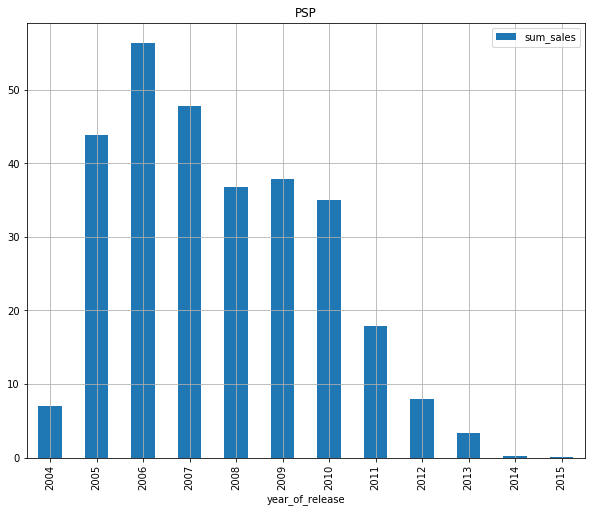

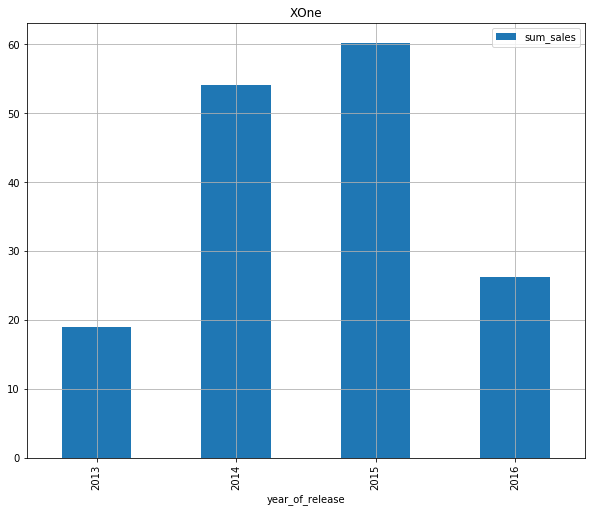

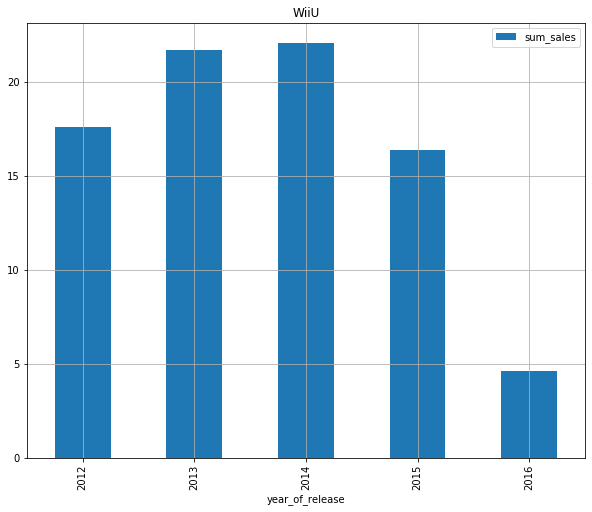

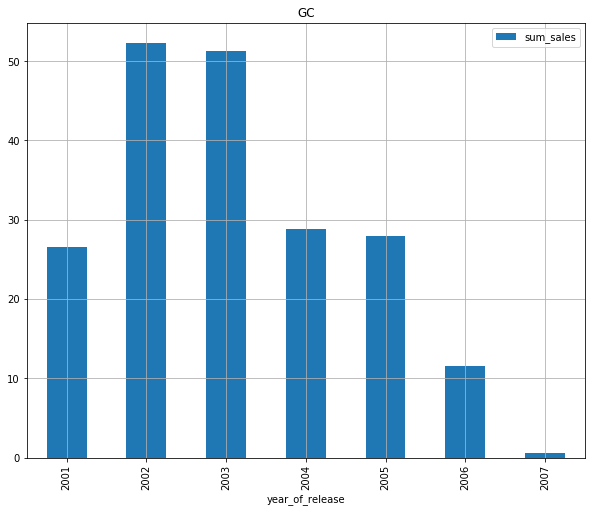

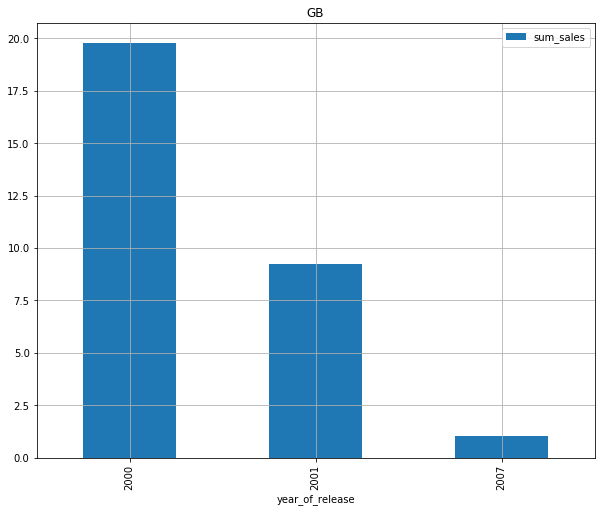

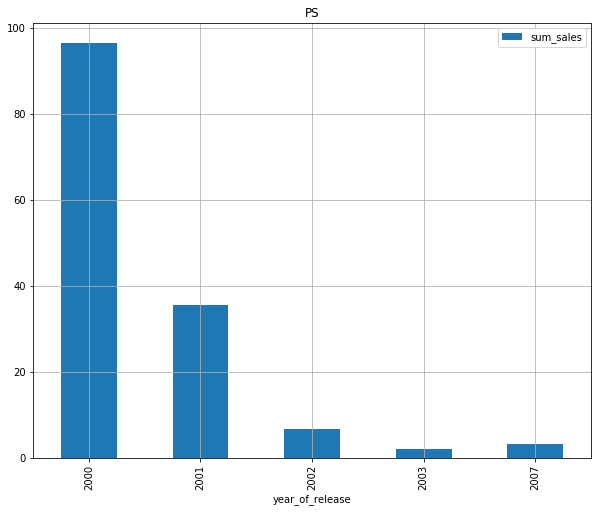

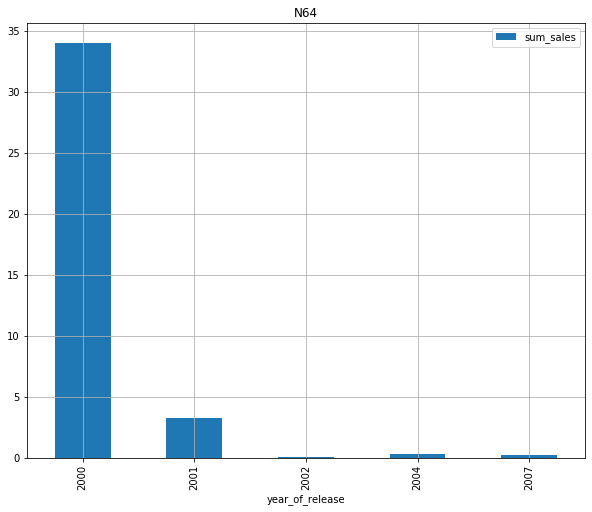

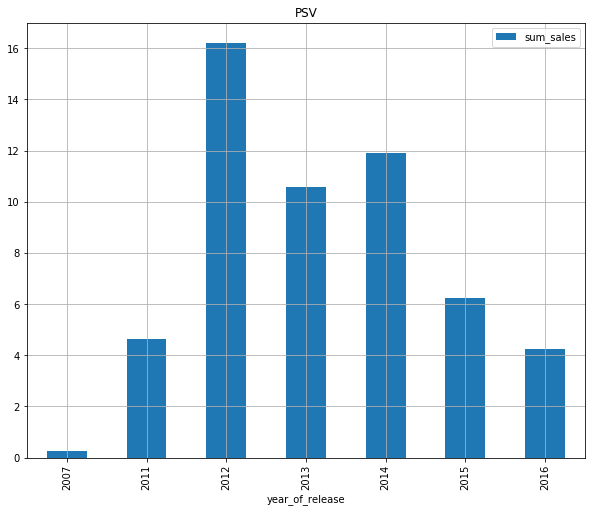

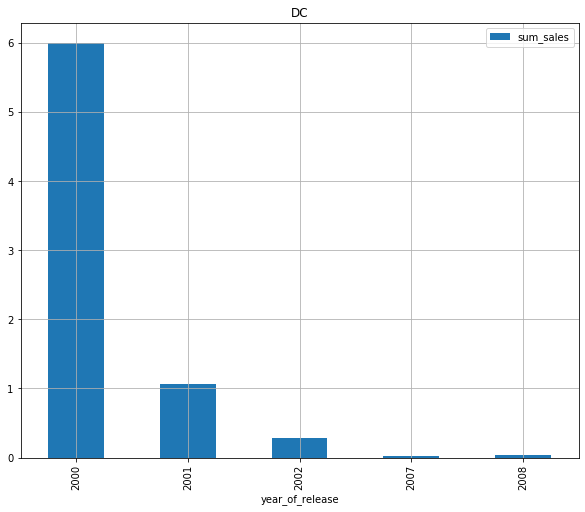

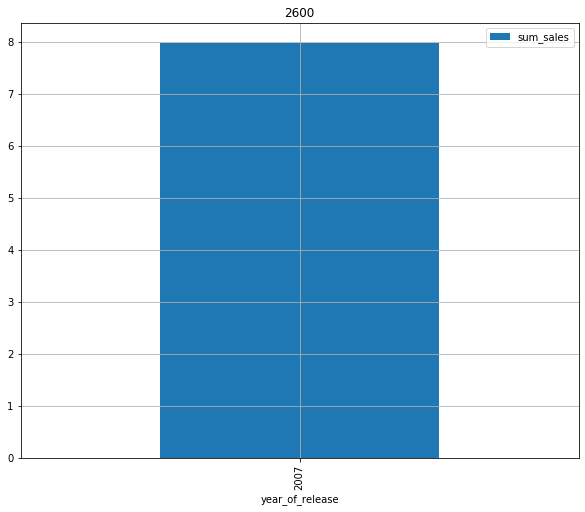

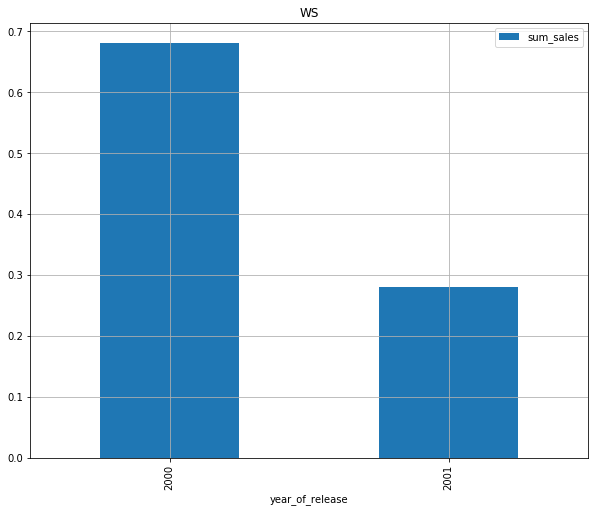

In [55]:
for i in new_platforms_list:
    #print(i)
    plat_year_2000[plat_year_2000['platform'] == i].plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(10,8), grid=True, title=i)

3DS - имела хорошие продажи с 2011 по 2016 годы. Продажи падают, но за 2016 год нормальные значения.

DC - хорошие показатели продаж с 1998 по 2001. После 2002 года практически ничего не заработали. Есть разрыв в годах продаж с 2002 по 2007. Продаж нет за 2016.

DS - отличные продажи с 2004 по 2012 годы. Продажи падают. Последний год 2013.

GB - хорошие продажи с 1989 по 2001. Продаж нет за 2016.

GBA - хорошие продажи с 2001 по 2007. Продаж нет за 2016.

GC - хорошие продажи с 2001 по 2007. Продаж нет за 2016.

N64 - хорошие продажи с 1996 по 2001. Разрыв с 2002 по 2004, дальше нет продаж.

PC - хорошие продажи с 1992 по 2016. Однозначно берем в расчет. Продажи падают - скорее всего из-за появления множества специализированных платформ, но они значительные

PS - хорошие продажи с 1994 по 2003. Дальше эра PS2. Продаж нет за 2016.

PS2 - хорошие продажи с 2000 по 2010. Дальше эра PS3. Продаж за 2016 нет.

PS3 - хорошие продажи с 2006 по 2016. Дальше эра PS4. Продажи падают, за 2016 не значительные.

PS4 - хорошие продажи с 2013 по 2016. Продажи растут, но по отношению 2015 к 2016 падают. Перспективы есть.

PSP - хорошие продажи с 2006 по 2014. Продаж за 2016 нет.

PSV - хорошие продажи с 2011 по 2016. Продажи стабильные. Перспективы есть.

WS - продажи с 1999 по 2001.
 
Wii - хорошие продажи с 2006 по 2015. Продажи падают. За 2016 есть продажи, но не значительные. Дальше эра WiiU.

WiiU - хорошие продажи с 2012 по 2016.

X360 - хорошие продажи с 2005 по 2016. Продажи падают, за 2016 год продажи не значительные.

XB - хорошие продажи с 2000 по 2008.

XOne - хорошие продажи с 2013 по 2016. Продажи растут, но по отношению 2015 к 2016 падают. Перспективы есть.

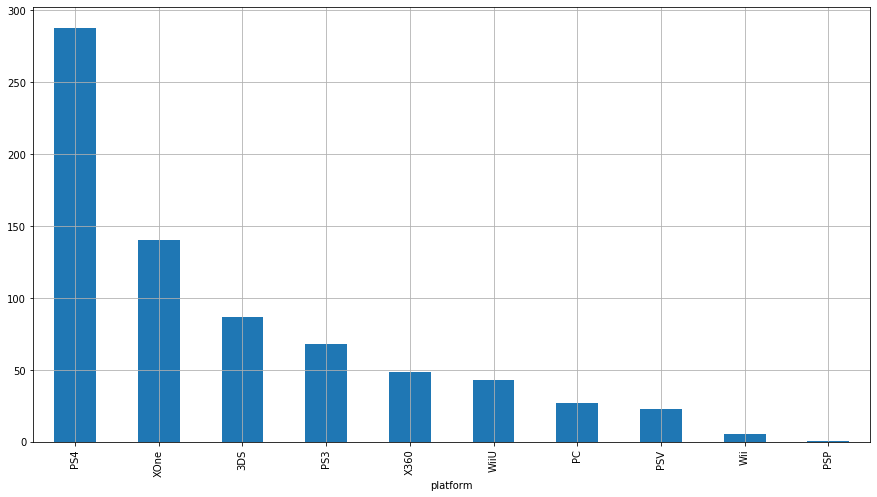

In [56]:
plat_year_2000[plat_year_2000['year_of_release'] >= 2014].groupby('platform')['sum_sales'].agg('sum').\
sort_values(ascending=False).plot(kind='bar', figsize=(15,8), grid=True);

**В расчет приняты как потенциально прибыльные: Wii, WiiU, X360, PS3, PS4, 3DS, PC, XOne, PSV. Самые перспективные платформы - PS4, XOne, 3DS т.к. только набирают обороты по продажам и относительно молоды.**

In [57]:
plt_list = ['Wii', 'WiiU', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'PSV']
plt_list

['Wii', 'WiiU', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'PSV']

In [58]:
games_2000[games_2000['platform'].isin(plt_list)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,66.619503,6.819362,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.629101,7.054044,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.968174,6.961197,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,7.133000,E,0.01


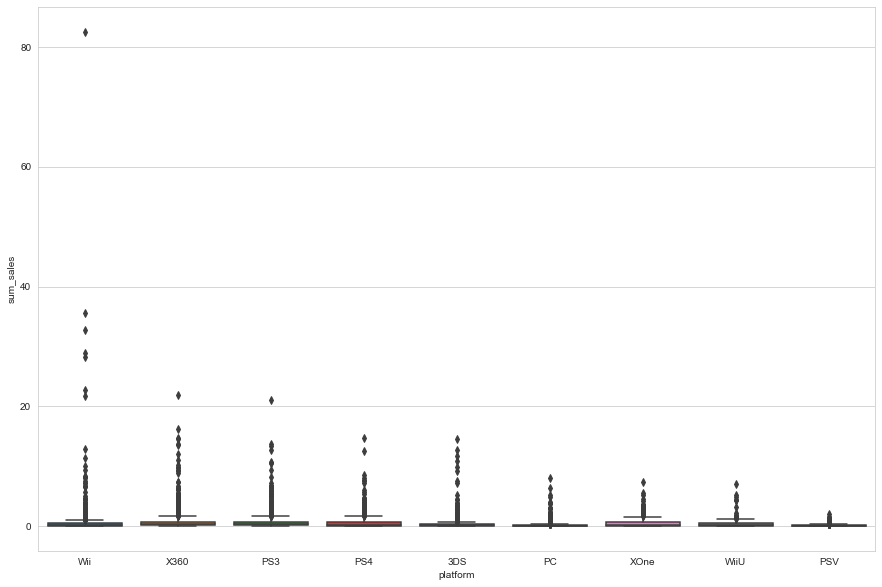

In [59]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.boxplot(x='platform', y='sum_sales', data=games_2000[games_2000['platform'].isin(plt_list)])

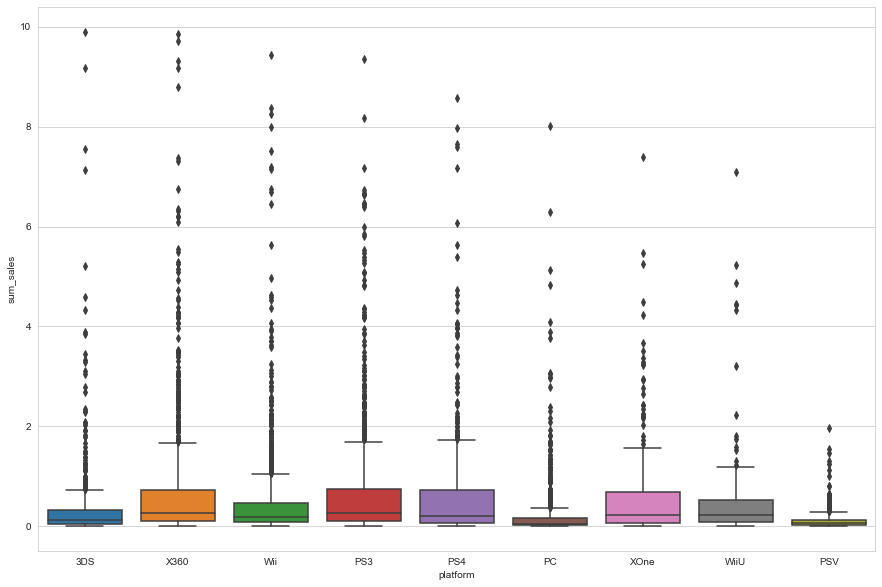

In [60]:
plt.figure(figsize=(15, 10))

sns.boxplot(x='platform', y='sum_sales', data=games_2000[(games_2000['platform'].isin(plt_list)) & (games_2000['sum_sales'] < 10)])

Для каждой платформы есть разброс. Наименьший разброс на платфореме - PSV. Наибольшый - Wii.

Наибольшие значения суммарных продаж на трех платформах - Wii, X360, PS3. Наименьшее значение - PSV.
Скорее всего это связано с тем, что эти платформы дольше существуют.

Средние продажи на различных платформах также значительно отличаются, скорее всего это связано с наличие выбросов.

In [61]:
games_2000[games_2000['platform'] == 'Wii'][['critic_score', 'user_score', 'sum_sales']].corr(method='spearman')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.431294,0.153736
user_score,0.431294,1.000000,0.080518
sum_sales,0.153736,0.080518,1.000000


In [62]:
games_2000[games_2000['platform'] == 'Wii'][['critic_score', 'user_score', 'sum_sales']].corr(method='pearson')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.482931,0.128423
user_score,0.482931,1.000000,0.089222
sum_sales,0.128423,0.089222,1.000000


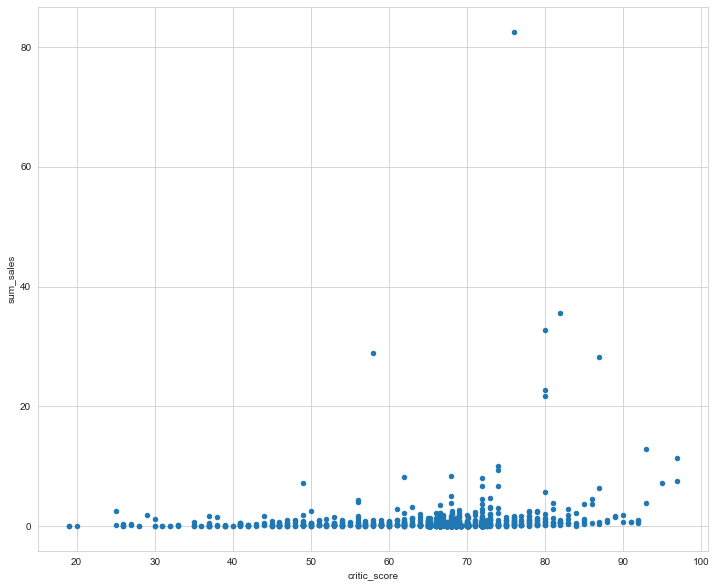

In [63]:
games_2000[games_2000['platform'] == 'Wii'][['critic_score', 'sum_sales']].plot(kind='scatter', x='critic_score', \
                                                                                y='sum_sales', grid=True, figsize=(12, 10));

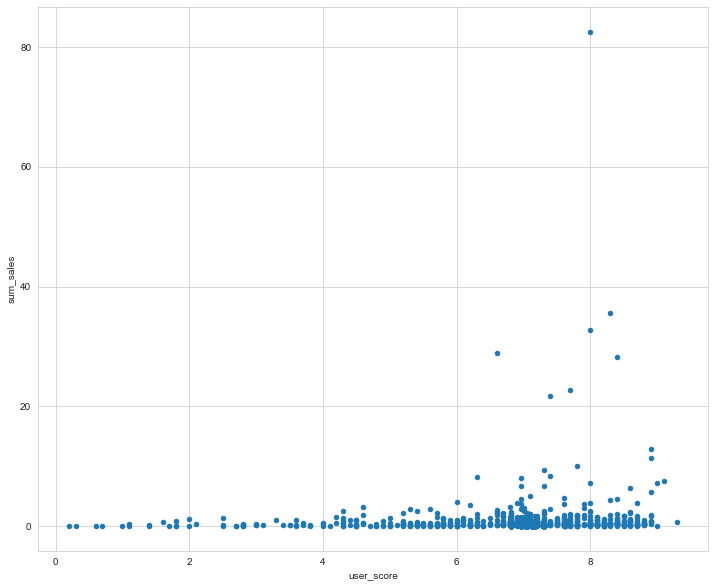

In [64]:
games_2000[games_2000['platform'] == 'Wii'][['user_score', 'sum_sales']].plot(kind='scatter', x='user_score', y='sum_sales',\
                                                                               grid=True, figsize=(12, 10));

Отзывы критиков имеют значение корреляции с суммарными продажами выше чем отзывы пользователей. Однако, значения отзывов и тех и других говорит о незначительной корреляции/взаимосвяззи с суммарными продажами.

In [65]:
games_2000[games_2000['platform'] == 'X360'][['critic_score', 'user_score', 'sum_sales']].corr(method='spearman')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.513678,0.532759
user_score,0.513678,1.000000,0.211983
sum_sales,0.532759,0.211983,1.000000


In [66]:
games_2000[games_2000['platform'] == 'PS3'][['critic_score', 'user_score', 'sum_sales']].corr(method='spearman')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.485304,0.490912
user_score,0.485304,1.000000,0.188270
sum_sales,0.490912,0.188270,1.000000


In [67]:
games_2000[games_2000['platform'] == 'PSV'][['critic_score', 'user_score', 'sum_sales']].corr(method='spearman')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.535418,0.339990
user_score,0.535418,1.000000,0.192141
sum_sales,0.339990,0.192141,1.000000


Распростронить полученные выводы для одной платформы на другие нельзя, так как у других платформ имеются более значимые значения коэффициента корреляции отзывов критикой и пользователей на суммарные продажи. 

Можно лишь сделать вывод, что в зависимости от платформы влияние отзывов (в основном критиков) значительно изменяется.

              count      sum     ratio
genre                                 
Shooter        1155   921.26  0.797628
Platform        730   496.64  0.680329
Sports         2021  1152.52  0.570272
Role-Playing   1317   734.70  0.557859
Racing         1058   566.24  0.535198
Action         3140  1553.67  0.494799
Fighting        652   316.77  0.485844
Misc           1626   730.57  0.449305
Simulation      784   337.42  0.430383
Puzzle          490   140.88  0.287510
Strategy        560   116.73  0.208446
Adventure      1204   188.00  0.156146


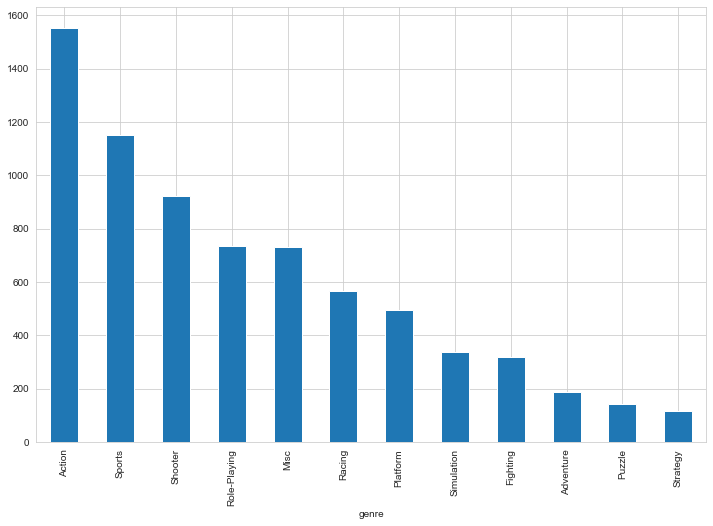

In [68]:
genres = games_2000.groupby('genre')['sum_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)
genres['ratio'] = genres['sum'] / genres['count']
print(genres.sort_values(by='ratio', ascending=False))
genres.sort_values(by='sum', ascending=False)['sum'].plot(kind='bar', figsize=(12,8), grid=True);

Больше всего прибыли в жанре action, меньше всего в жанре strategy. Однако, жанр action помимо большой прибыли имеет и самое большое количество игр, что и обуславливает общую прибыль.

Наибольшую прибыль с одной игры (отношение общей прибыли к количеству игр в жанре) имеет жанр shooter.

Первые три жанра (action, sports, shooter) на графике можно считать жанрами с высокими продажами и три последних жанра, жанрами с низкими продажами (adventure, puzzle, strategy).

### Вывод по разделу:

В результате анализа данных были выявлены года актуальные для возможного прогнозирования прибыли на следующий год, такие года идут от 2000. Также выявлены наиболее перспективные платформы и платформы с наибольшими суммарными продажами. В основном это специализированные платформы, которые создают новые поколения и игры выходят на новые, отбрасывая в прошлое старые версии платформ. Прогресс одним словом).

Также произведен графический анализ продаж каждой игры в зависимости от платформы - выявлены значительные расхождения в суммарных данных по продажам игр и в их средних. Обнаруженные выбросы для каждой платформы говорят о том, что некоторые игры явно более популярные чем основая масса.

Значительной корреляции пользовательских оценок на продажи не выявлено. Есть корреляция в районе значения 0.5 для отдельных платформ.

Выделяются жанры с высокими и низкими продажами. Также заметны жанры с бОльшей прибылью на игру, то есть более прибыльные.

### Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
games_2000.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales'],
      dtype='object')

In [70]:
games_2000_na = games_2000[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales']]
games_2000_na

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,66.629101,7.054044,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,71.968174,6.961197,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,65.331269,7.133000,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,68.058350,7.301402,E,0.01


In [71]:
games_2000_na_ration = games_2000_na.groupby('platform').agg('sum')
games_2000_na_ration['ratio'] = games_2000_na_ration['na_sales'] / games_2000_na_ration['sum_sales']
games_2000_na_ration.sort_values('ratio', ascending=False).head()

,year_of_release,na_sales,critic_score,user_score,sum_sales,ratio
platform,,,,,,
2600,32112,7.46,1086.640514,113.321432,7.97,0.936010
XB,1651000,186.69,57447.079168,6078.438803,257.74,0.724335
GC,1113902,133.46,38544.105409,4128.545038,198.93,0.670889
X360,2536424,602.47,86573.606712,8541.526228,971.42,0.620195
GBA,1646678,187.54,55753.260552,5984.758596,317.85,0.590027


In [72]:
na_list = games_2000_na_ration.sort_values('ratio', ascending=False).head().index
na_list

Index(['2600', 'XB', 'GC', 'X360', 'GBA'], dtype='object', name='platform')

In [73]:
games_2000_eu = games_2000[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales']]
games_2000_eu

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,28.96,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,12.76,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,10.93,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,9.14,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,9.18,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,66.629101,7.054044,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.01,71.968174,6.961197,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,65.331269,7.133000,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.00,68.058350,7.301402,E,0.01


In [74]:
games_2000_eu_ration = games_2000_eu.groupby('platform').agg('sum')
games_2000_eu_ration['ratio'] = games_2000_eu_ration['eu_sales'] / games_2000_eu_ration['sum_sales']
games_2000_eu_ration.sort_values('ratio', ascending=False).head()

,year_of_release,eu_sales,critic_score,user_score,sum_sales,ratio
platform,,,,,,
PC,1876859,123.41,69247.245540,6589.421948,209.48,0.589125
PS4,789937,141.09,27729.869379,2702.583881,314.14,0.449131
PS3,2676370,330.29,92714.002832,9111.225590,939.65,0.351503
PS,562189,48.16,19055.176800,2026.481066,143.98,0.334491
XOne,497693,51.59,17683.502847,1647.522960,159.32,0.323814


In [75]:
eu_list = games_2000_eu_ration.sort_values('ratio', ascending=False).head().index
eu_list

Index(['PC', 'PS4', 'PS3', 'PS', 'XOne'], dtype='object', name='platform')

In [76]:
games_2000_jp = games_2000[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales']]
games_2000_jp

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,3.77,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,3.79,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,3.28,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,6.50,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,2.93,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,66.629101,7.054044,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,71.968174,6.961197,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,65.331269,7.133000,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.00,68.058350,7.301402,E,0.01


In [77]:
games_2000_jp_ration = games_2000_jp.groupby('platform').agg('sum')
games_2000_jp_ration['ratio'] = games_2000_jp_ration['jp_sales'] / games_2000_jp_ration['sum_sales']
games_2000_jp_ration.sort_values('ratio', ascending=False).head()

,year_of_release,jp_sales,critic_score,user_score,sum_sales,ratio
platform,,,,,,
WS,8002,0.96,289.477477,29.829385,0.96,1.000000
DC,62025,3.96,2314.931989,235.615792,7.41,0.534413
GB,56017,13.01,1959.546718,204.900003,30.03,0.433233
PSV,866070,21.91,29536.347484,3107.467944,54.07,0.405215
3DS,1046778,100.67,35334.439831,3664.505068,259.00,0.388687


In [78]:
jp_list = games_2000_jp_ration.sort_values('ratio', ascending=False).head().index
jp_list

Index(['WS', 'DC', 'GB', 'PSV', '3DS'], dtype='object', name='platform')

Самые популярные платформы для региона NA - 'XB', 'GC', 'X360', 'GBA', 'XOne'. Они занимают доли продаж от 58% до 72%.

Самые популярные платформы для региона EU - 'PC', 'PS4', 'PS3', 'PS', 'XOne'. Они занимают доли продаж от 32% до 59%.

Самые популярные платформы для региона JP - 'WS', 'DC', 'GB', 'PSV', '3DS'. Они занимают доли продаж от 39% до 100%.

Для региона JP платформа WS имеет 100% продаж, то есть предположительно есть вариант что игры или платформа выпускались только в данном регионе или настолько специфичны.
Платформа XOne для регионов NA и EU имеет суммарно 90% всех продаж, что также может быть вызвано специфичными факторами.
Регион NA имеет для платформы XB продажи на уровне 72%, что говорит о высокой популярности данной платформы в регионе.

In [79]:
games_2000_na.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head()

genre
Action          768.00
Sports          602.62
Shooter         500.28
Misc            372.97
Role-Playing    283.07
Name: na_sales, dtype: float64

In [80]:
genre_na_list = games_2000_na.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head().index
genre_na_list

Index(['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing'], dtype='object', name='genre')

In [81]:
games_2000_eu.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head()

genre
Action     474.69
Sports     345.04
Shooter    296.70
Misc       198.85
Racing     194.04
Name: eu_sales, dtype: float64

In [82]:
genre_eu_list = games_2000_eu.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head().index
genre_eu_list

Index(['Action', 'Sports', 'Shooter', 'Misc', 'Racing'], dtype='object', name='genre')

In [83]:
games_2000_jp.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head()

genre
Role-Playing    243.73
Action          133.52
Misc             86.52
Sports           76.49
Platform         55.39
Name: jp_sales, dtype: float64

In [84]:
genre_jp_list = games_2000_jp.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head().index
genre_jp_list

Index(['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'], dtype='object', name='genre')

Самые популярные жанры в регионе NA - 'Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing'.

Самые популярные жанры в регионе EU - 'Action', 'Sports', 'Shooter', 'Misc', 'Racing'.

Самые популярные жанры в регионе JP - 'Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'.

Для регионов NA и EU популярные жанры примерно одинаковы, для региона JP популярные жанры несколько отличаются, хотя больше порядком.
Это можно объяснить менталитетом - то есть различием поведения и жизни в целом. 

In [85]:
games_2000_na.groupby('rating')['na_sales'].agg('median').sort_values(ascending=False)

rating
AO      1.260
EC      0.155
M       0.140
E10+    0.120
E       0.070
T       0.060
RP      0.000
Name: na_sales, dtype: float64

In [86]:
games_2000_na.groupby('rating')['na_sales'].agg('mean').sort_values(ascending=False)

rating
AO      1.260000
M       0.455849
E10+    0.248992
E       0.226482
T       0.191527
EC      0.191250
RP      0.000000
Name: na_sales, dtype: float64

In [87]:
games_2000_eu.groupby('rating')['eu_sales'].agg('median').sort_values(ascending=False)

rating
AO      0.61
M       0.08
RP      0.03
E10+    0.03
T       0.02
E       0.01
EC      0.00
Name: eu_sales, dtype: float64

In [88]:
games_2000_eu.groupby('rating')['eu_sales'].agg('mean').sort_values(ascending=False)

rating
AO      0.610000
M       0.296671
E       0.133515
E10+    0.132840
T       0.106601
RP      0.026667
EC      0.013750
Name: eu_sales, dtype: float64

In [89]:
games_2000_jp.groupby('rating')['jp_sales'].agg('median').sort_values(ascending=False)

rating
T       0.0
RP      0.0
M       0.0
EC      0.0
E10+    0.0
E       0.0
AO      0.0
Name: jp_sales, dtype: float64

In [90]:
games_2000_jp.groupby('rating')['jp_sales'].agg('mean').sort_values(ascending=False)

rating
T       0.074638
E       0.052691
M       0.037138
E10+    0.028330
RP      0.000000
EC      0.000000
AO      0.000000
Name: jp_sales, dtype: float64

Для каждого региона есть зависимость продаж и рейтинга игры.

Так как медианы менее показательны, использовал в дополнение средние.

### Вывод по разделу:

Для региона JP платформа WS имеет 100% продаж, то есть предположительно есть вариант что игры или платформа выпускались только в данном регионе или настолько специфичны. Платформа XOne для регионов NA и EU имеет суммарно 90% всех продаж, что также может быть вызвано специфичными факторами. Регион NA имеет для платформы XB продажи на уровне 72%, что говорит о высокой популярности данной платформы в регионе.

Для регионов NA и EU популярные жанры примерно одинаковы, для региона JP популярные жанры несколько отличаются, хотя больше порядком. Это можно объяснить менталитетом - то есть различием поведения и жизни в целом.

Для каждого региона есть зависимость продаж и рейтинга игры.
Так как медианы менее показательны, использовал в дополнение средние.

### Шаг 5. Провека гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**В обоих случаях формирования нулевой и альтернативной гипотезы мы руководствуемся правилом о том, что нулевая гипотеза - это равенство, а альтернативная не равенство (либо порог больше/меньше).**

В обоих случаях выборки независимые, так как нет связи между платформами или жанрами. Критерий оценки - Т-критерий для независимых выборок.
______________________________________________________________________________

Нулевая гипотеза - средние пользовательских рейтингов платформ Xbox One и PC одинаковые.
Альтернативная гипотеза - средние пользовательских рейтингов платформ Xbox One и PC не одинаковые.

То есть двухсторонний критерий.

In [91]:
games_2000_XOne = games_2000[games_2000['platform'] == 'XOne']['user_score'].values
games_2000_PC = games_2000[games_2000['platform'] == 'PC']['user_score'].values

In [92]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(games_2000_XOne, games_2000_PC)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value 5.806387399709373e-05
Отвергаем нулевую гипотезу


In [93]:
games_2000_XOne.mean()

6.67013344255993

In [94]:
games_2000_PC.mean()

7.055055618318487

Мы отвергли нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, соответственно, средние пользовательстких рейтингов платформ различны.
_____________________________________________________________________________________________________________________________

Нулевая гипотеза - cредние пользовательских рейтингов жанров Action и Sports одинаковые. Альтернативная гипотеза - средние пользовательских рейтингов жанров Action и Sports не одинаковые.

In [95]:
games_2000_action = games_2000[games_2000['genre'] == 'Action']['user_score'].values
games_2000_sports = games_2000[games_2000['genre'] == 'Sports']['user_score'].values

In [96]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(games_2000_action, games_2000_sports)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value 0.006287413380645638
Отвергаем нулевую гипотезу


In [97]:
games_2000_action.mean()

7.046945198566006

In [98]:
games_2000_sports.mean()

6.959228598357322

Мы отвергли нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, соответственно, средние пользовательстких рейтингов жанров различны.
_____________________________________________________________________________________________________________________________

### Выводы по разделу:

Мы отвергли нулевые гипотезы для обоих случаев, соответственно, средние пользовательских рейтингов платформ Xbox One и PC различны, и средние пользовательстких рейтингов жанров Action и Sports различны.

## Общий вывод по проекту:

Были обработаны пропуски в данных в зависимости от типа признака - средним, медианой, модой. Часть данных удалена - из-за невозможности восстановить значения наименования игры и жанра, а без этой информации анализ не произвести. Также были "добыты") данные по годам релиза некоторых игр. Дублей в данных нет.
Изменены типы данных в двух столбцах - год релиза и пользовательских оценок.

Далее были оценены годы по суммарному количеству игр и для дальнейшего анализа были оставлены годы с 2000. 

Полученные данные позволили сделать выводы о том, что многие платформы ушли в прошлое, выделили перспективные платформы - потенциально прибыльные; определили выбросы и продажи по платформам - различия в суммарных продажах и в средних значительны; отзывы пользователей на продажи не имеют значимой корреляции, отзывы критиков имеют корреляцию до 0.5 (плюс-минус); жанры с высокими продажами - action, sports, shooter, жанры с низкими продажами - adventure, puzzle, strategy, жанр - shooter самый прибыльный (наибольшая прибыль с одной игры).

Мы отвергли нулевые гипотезы для обоих случаев - средние пользовательских рейтингов платформ Xbox One и PC одинаковые, и cредние пользовательских рейтингов жанров Action и Sports одинаковые. Средние пользовательских рейтингов платформ Xbox One и PC различны, и средние пользовательстких рейтингов жанров Action и Sports различны.